# DeepAR model description 
Full article of [DeepAR](https://reader.elsevier.com/reader/sd/pii/S0169207019301888?token=AE6037F82646EC0EA8BFFB753470A7D3B98EBEF5818880032CEA3BA2ED82A5EF217B044060B6EDC082188982168E7C67&originRegion=eu-west-1&originCreation=20230307110843) architecture. \
In this notebook we'll explain the process of our work and show the result we achived. \

This notebook aims to provide you with the flexibility to select any application and metric of your choice for testing purposes. \
We have developed separate models for each application, which learn from data collected from all pods on which the application has run. These models are initialized with specific parameters and settings that we have found to be appropriate for most applications.






### Architecture and settings
Due to our limited resources and hardware, we have determined that the optimal architecture and settings for our model are : \


*   A Hidden size 30
*   2 RNN Layers 
*   Learning Rate 0.01
*   Normal Distribution objective function
*   30 training Epochs for each model yield the best results given our constrains

### Data transformations
During our training process, we faced a challenge when working with variable length data using PyTorch dataloaders. To address this, we implemented a sliding window technique that enabled us to process fixed-sized batches.

To ensure we could still track the origin series of each data point, we assigned a unique "device" value to each series. Using the sliding window method, we divided each device into multiple "serieses" with each series representing a segment of the original device.

The devices were created with overlapping segments that depended on the stride size we defined. By doing this, we were able to overcome the variable length issue and create fixed-size batches while preserving the original series data. \


### Subsampling and aggregation

To determine the optimal subsampling and aggregation approach, we conducted a cross-validation analysis using different subsampling values and aggregation methods (max, min, mean).\
 We evaluated the performance of each approach using the mean squared error (**MSE**), mean absolute scaled error (**MASE**), and mean absolute percentage error (**MAPE**) metrics. \
 Based on our results, we found that the '**mean**' aggregation method yielded the best performance, and the optimal subsampling value was **30** (i.e., averaging 30 samples taken every minute).

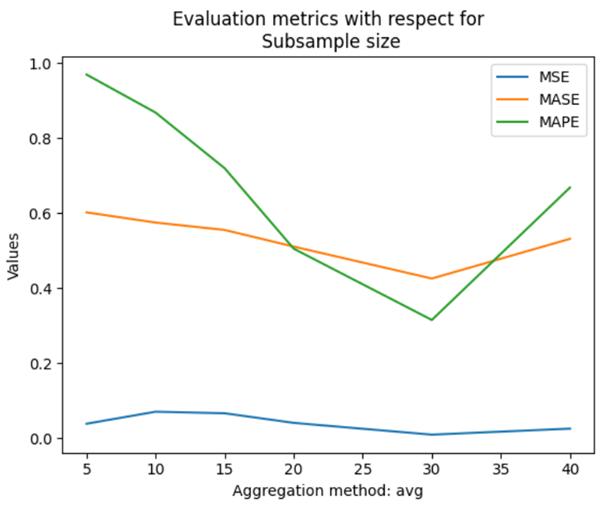

### Training and testing

After extensive testing and taking into account hardware limitations and data availability, a decision was made to set the size of each "series" or "window" to 100. This allows for uniformity and consistency in the data used for training, validation, and testing.


like it mentioned above in Data transformations sagement, each 'device' is splitted to 'serieses' (windows).

After extensive testing and taking into account hardware limitations and data availability, a decision was made to set the size of each "series" or "window" to 100.

In addition, a validation set and test set were created. This allows for a better understanding of the parameters that need to be tuned for each application, as the model will be trained on less data, but tested on separate and distinct data sets. Overall, these decisions were made to optimize the model's performance and accuracy.

### Prediction length
We experimented with various prediction lengths to identify the optimal value for our model.\
 After testing, we found that the best prediction length was **8**, which corresponds to a total forecast horizon of **4** hours \
 (given the subsampling rate of 30). \
 In the picture below you can see the **MSE** with respect to the prediction length, \
but we also tried it with other metrics like MASE and MAPE.

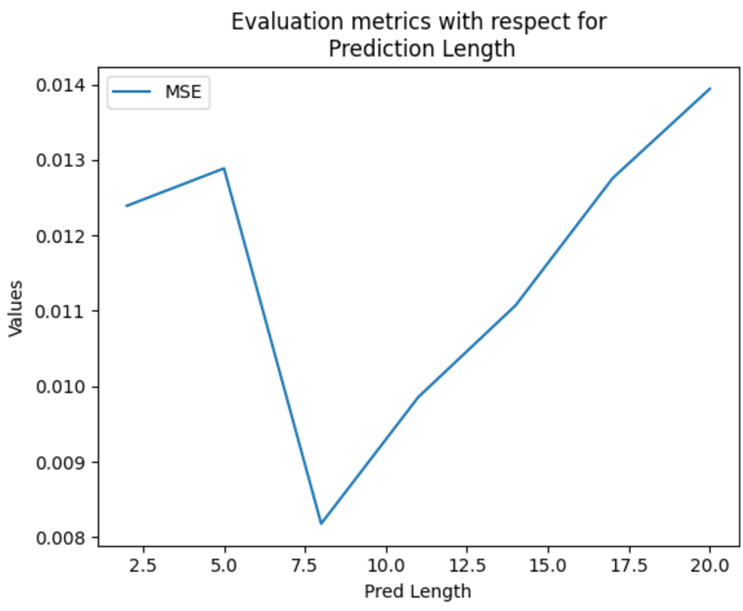

# Test Bench

Here we going to show result on the Collector app on CPU and Memory containers. \
For each experiment, we analyzed multiple 'serieses' (which are windows of the original time series) from various devices (the original time series). Following each test, we generated a visualization depicting the original time series data, as well as the predicted values for the entire series.

In [5]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(2, 'C:\\Users\\itay3\\VirtualCodeProjects\\AppLearner-2\\src')
import framework__deepar as deepAR
import framework__test_bench_deepar as bench

c:\Users\itay3\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
test_to_perform = []
metric = ['container_cpu','container_mem']
for met in metric:
    test_to_perform.append({"metric": met, "app": "collector", "prediction length": 8, "sub sample rate": 30, "data length limit": 128, "batch": 128, "stride": 20, "agg": "avg", "plot": True, "max epochs": 30})


[DeepAR TEST BENCH] Powering on test bench
Current App: collector
Metric: container_cpu
[DeepAR TEST BENCH] testing metric='container_cpu', app='collector'.
[DeepAR TEST BENCH] Fetching data for metric='container_cpu', app='collector'.
[DeepAR TEST BENCH] Read data from pkl.
[DeepAR TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.


GPU available: False, used: False


[DeepAR TEST BENCH] Throwing out data that is less than 64.0 hours long.
[DeepAR TEST BENCH] Scaling data.
[DeepAR TEST BENCH] Generating DataFrame from data
[DeepAR TEST BENCH] Making an instance of the class we want to test.
[DeepAR TEST BENCH] Starting training loop.


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 144   
3 | rnn                    | LSTM                   | 12.4 K
4 | distribution_projector | Linear                 | 62    
------------------------------------------------------------------
12.6 K    Trainable params
0         Non-trainable params
12.6 K    Total params
0.050     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 51/51 [00:04<00:00, 10.65it/s, loss=-1.41, v_num=62, train_loss_step=-1.45, val_loss=-.901, train_loss_epoch=-1.25]   

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 51/51 [00:04<00:00, 10.61it/s, loss=-1.41, v_num=62, train_loss_step=-1.45, val_loss=-.901, train_loss_epoch=-1.25]
[DeepAR TEST BENCH] Training took 133.9514708518982 seconds.
[DeepAR TEST BENCH] Starting testing loop


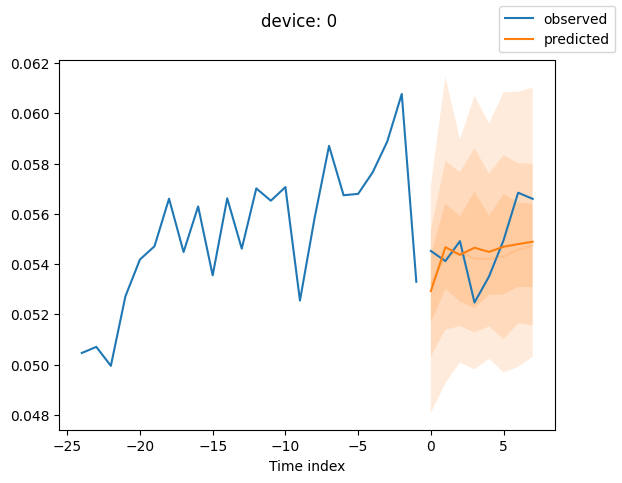

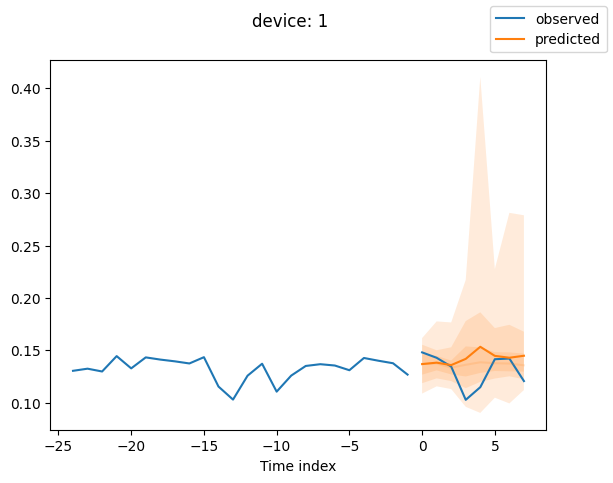

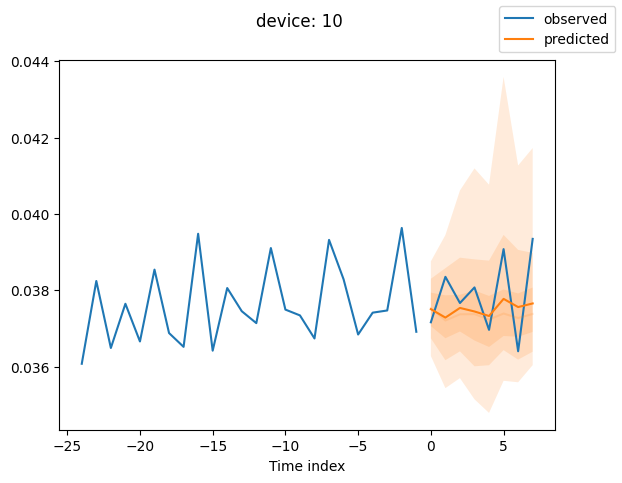

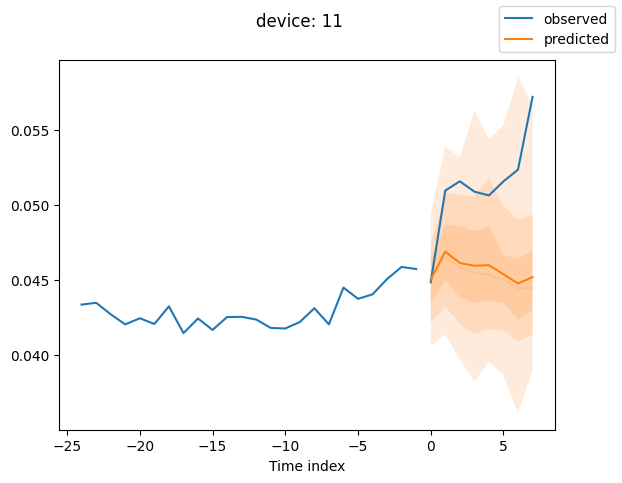

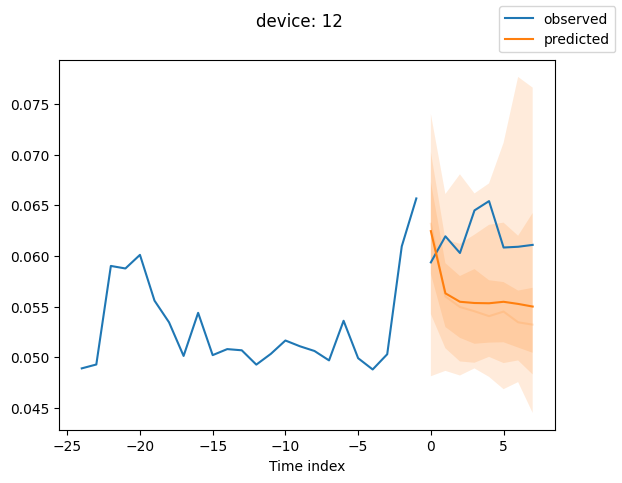

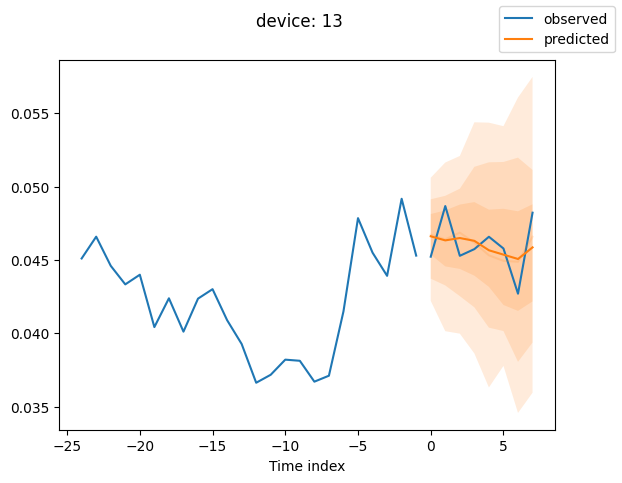

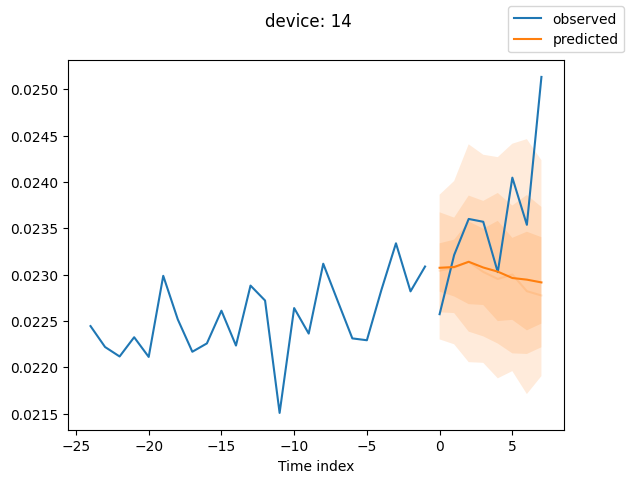

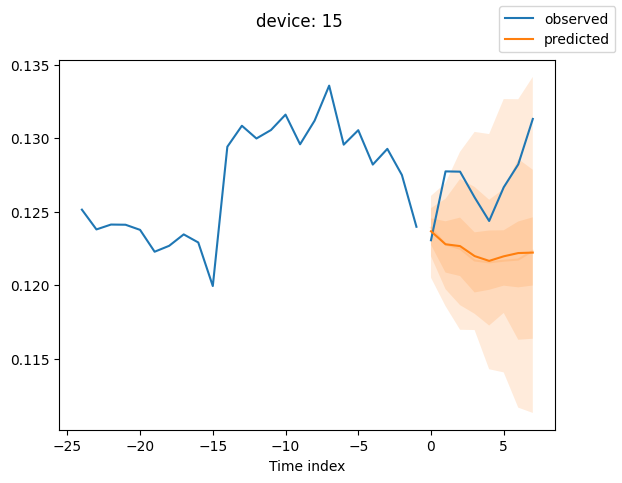

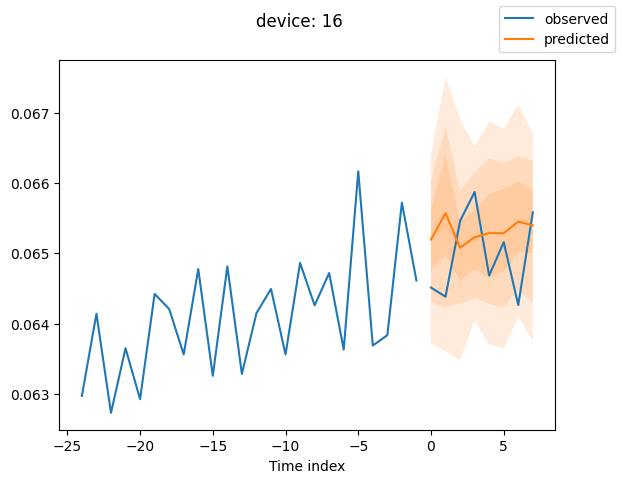

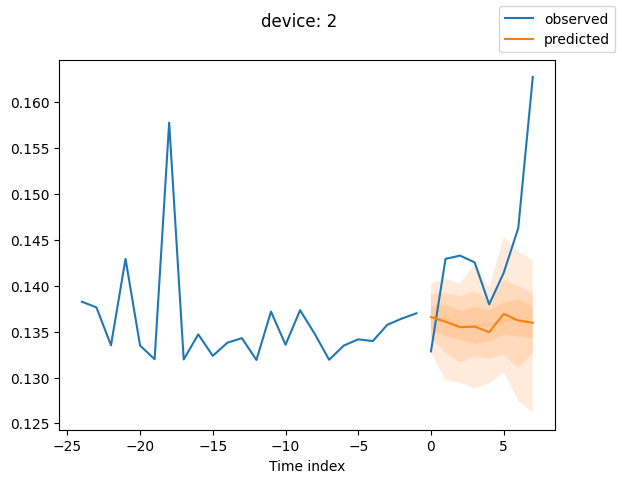

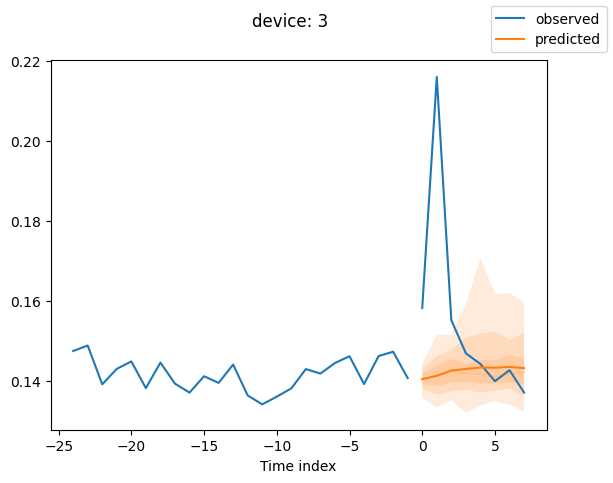

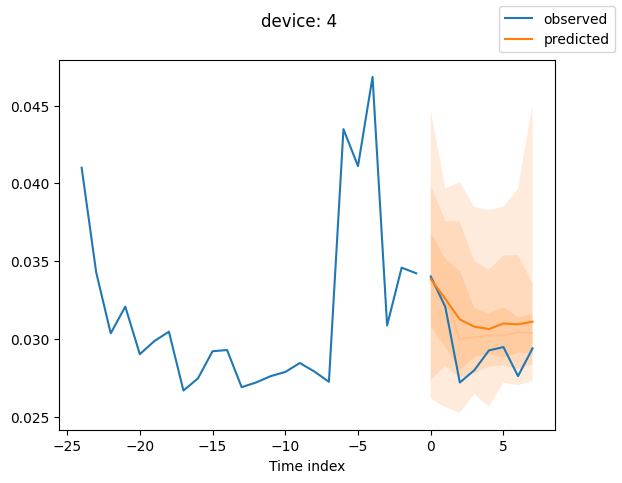

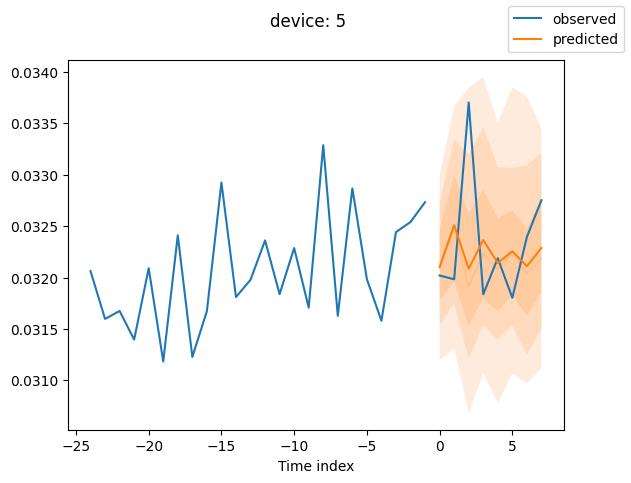

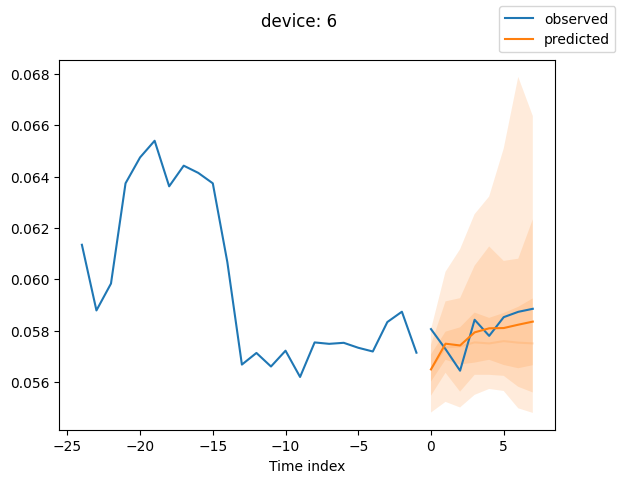

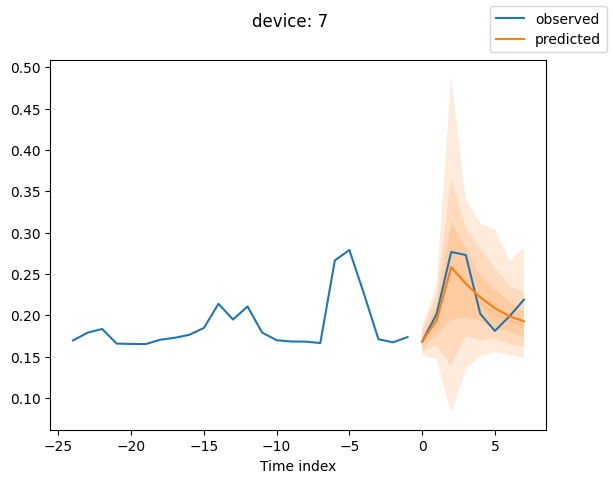

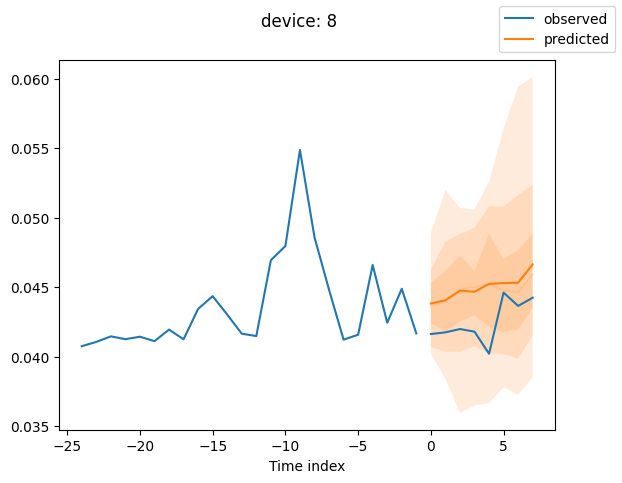

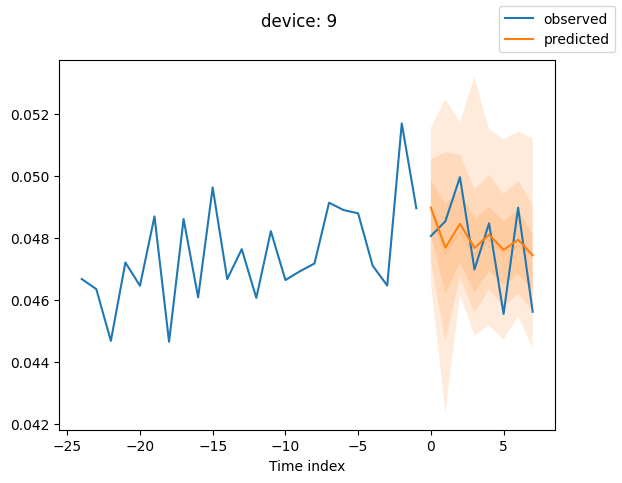

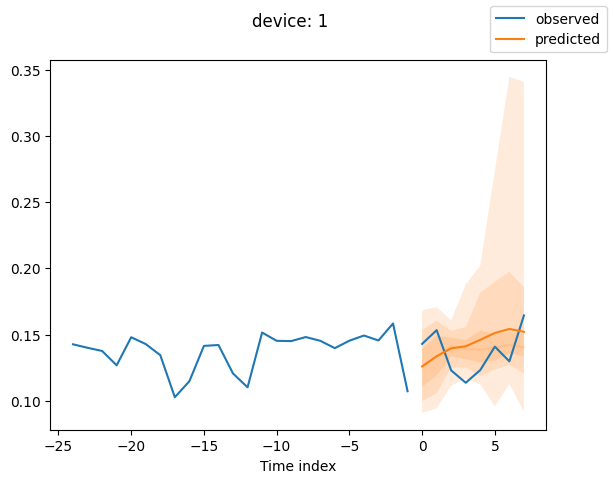

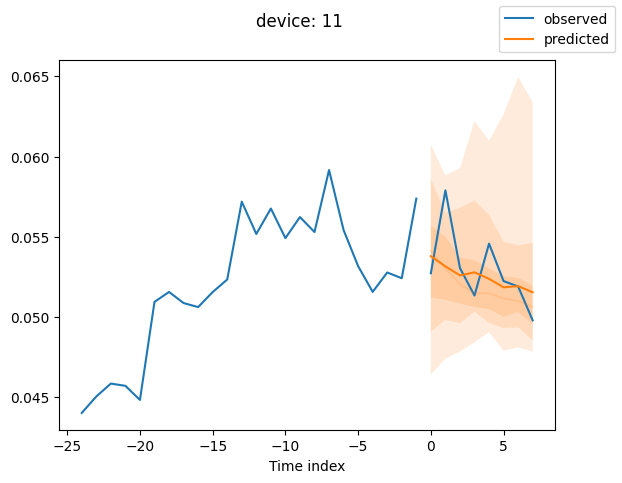

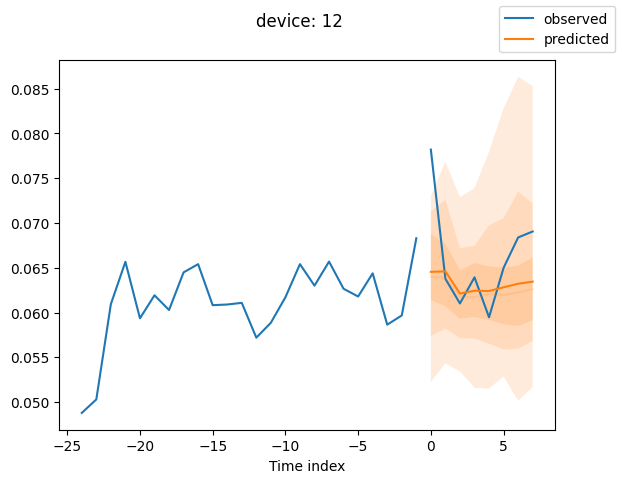

[DeepAR TEST BENCH] ***********************************************************************
[DeepAR TEST BENCH] REPORT for                              metric='container_cpu', app='collector':
[DeepAR TEST BENCH] Training time in seconds is             133.9514708518982
[DeepAR TEST BENCH] MSE over the test set is        0.03747227415442467
[DeepAR TEST BENCH] MASE over the test set is       0.5303991436958313
[DeepAR TEST BENCH] MAPE over the test set is       0.2098565697669983
[DeepAR TEST BENCH] ***********************************************************************
[DeepAR TEST BENCH] Performance of One-Point Forecasting Method on Full Length Time Series Data


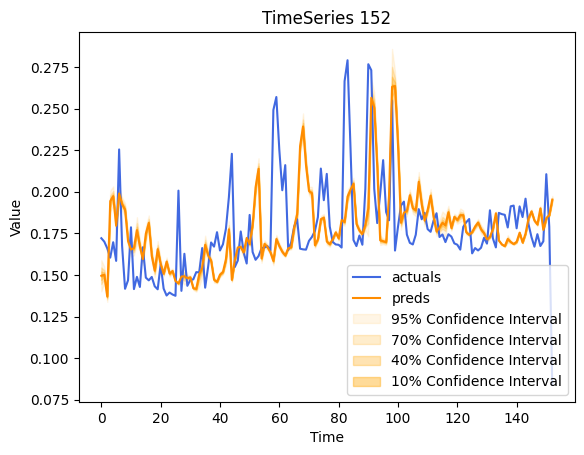

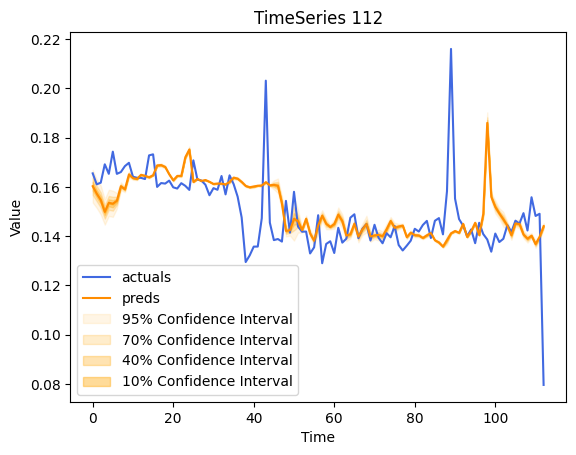

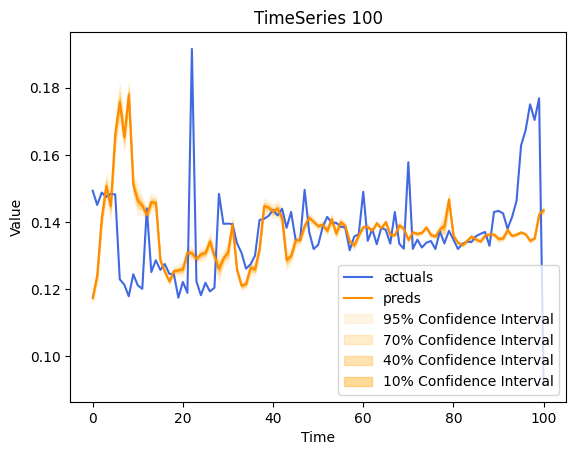

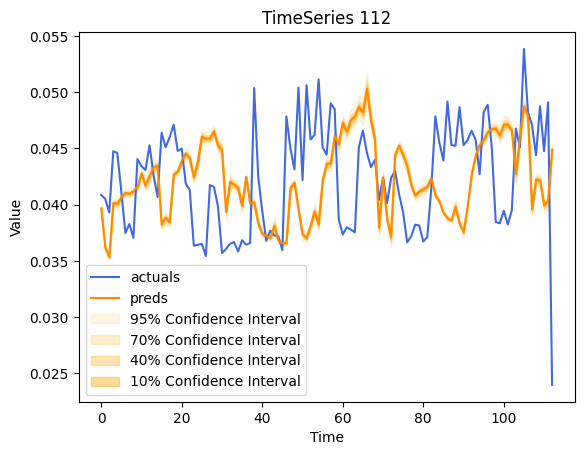

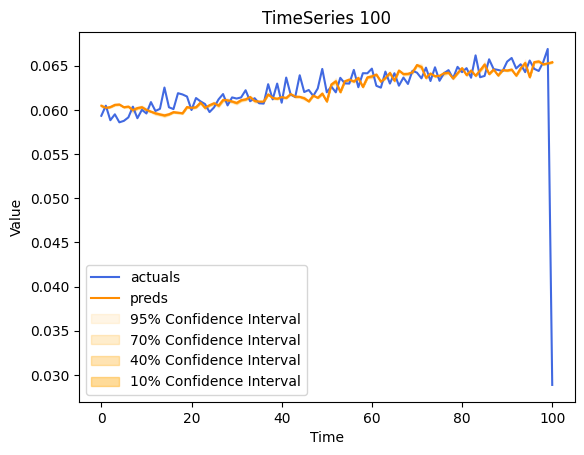

[DeepAR TEST BENCH] Done with metric='container_cpu', app='collector'
Current App: collector
Metric: container_mem
[DeepAR TEST BENCH] testing metric='container_mem', app='collector'.
[DeepAR TEST BENCH] Fetching data for metric='container_mem', app='collector'.
[DeepAR TEST BENCH] Read data from pkl.
[DeepAR TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.
[DeepAR TEST BENCH] Throwing out data that is less than 64.0 hours long.
[DeepAR TEST BENCH] Scaling data.
[DeepAR TEST BENCH] Generating DataFrame from data
[DeepAR TEST BENCH] Making an instance of the class we want to test.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 260   
3 | rnn                    | LSTM                   | 12.6 K
4 | distribution_projector | Linear                 | 62    
------------------------------------------------------------------
12.9 K    Trainable params
0         Non-trainable params
12.9 K    Total params
0.052     Total estimated model params size (MB)


[DeepAR TEST BENCH] Starting training loop.
Epoch 29: 100%|██████████| 51/51 [00:06<00:00,  7.69it/s, loss=-1.84, v_num=63, train_loss_step=-1.89, val_loss=-.845, train_loss_epoch=-1.77] 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 51/51 [00:06<00:00,  7.66it/s, loss=-1.84, v_num=63, train_loss_step=-1.89, val_loss=-.845, train_loss_epoch=-1.77]
[DeepAR TEST BENCH] Training took 196.40738725662231 seconds.
[DeepAR TEST BENCH] Starting testing loop


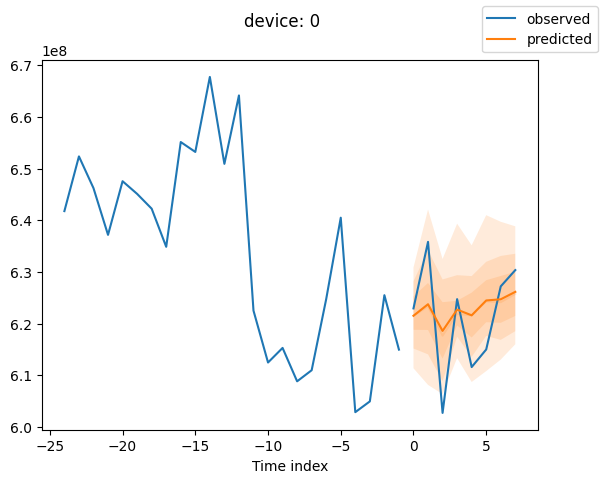

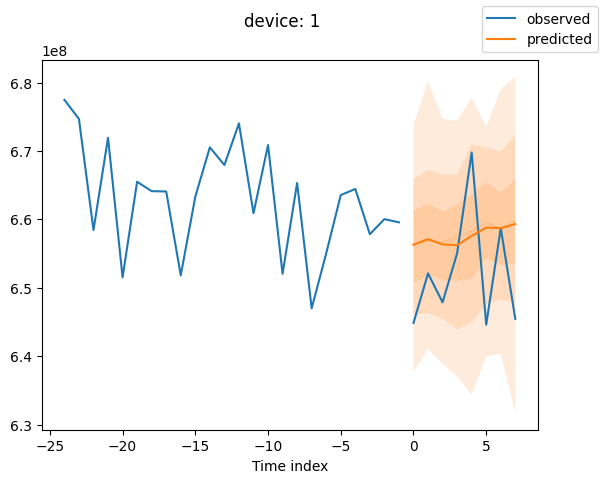

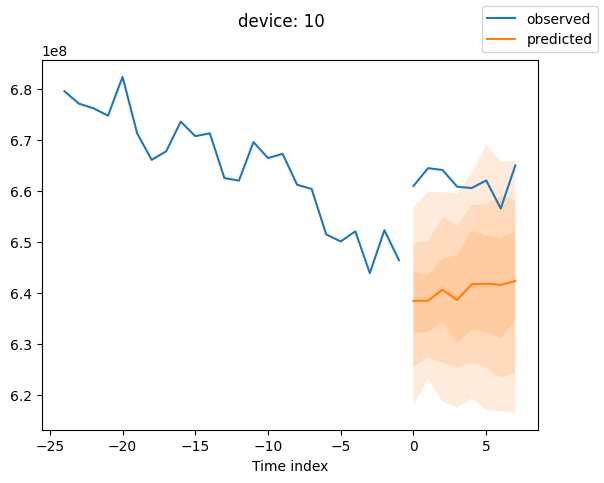

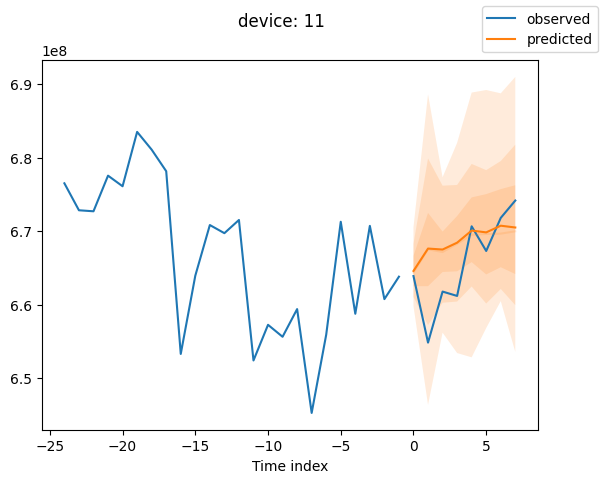

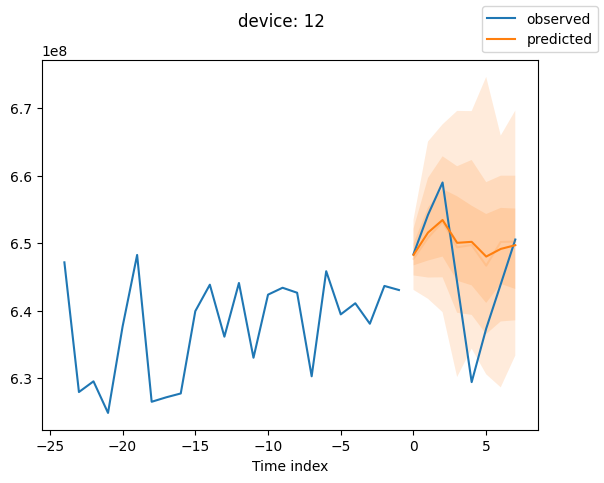

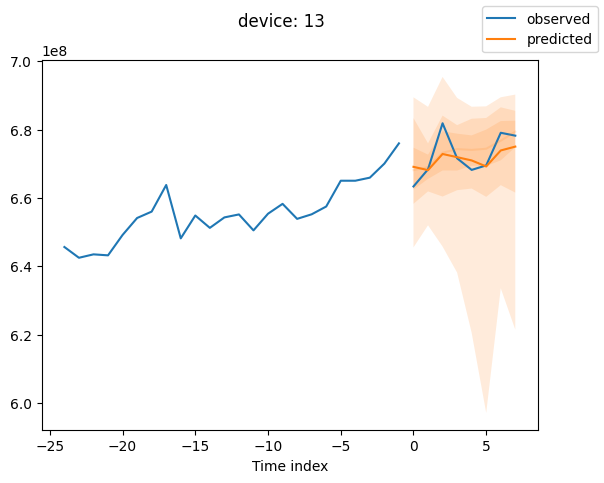

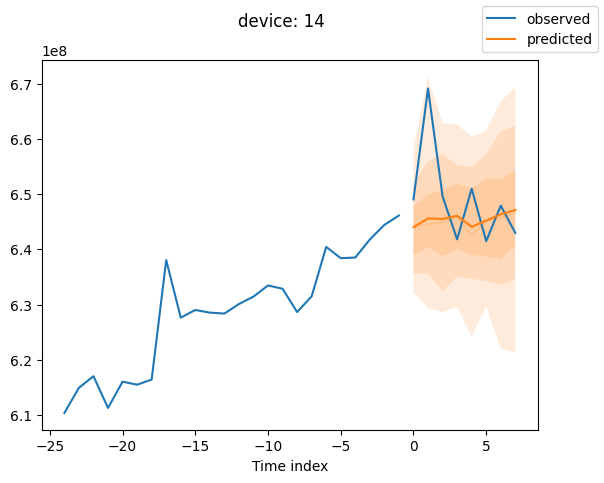

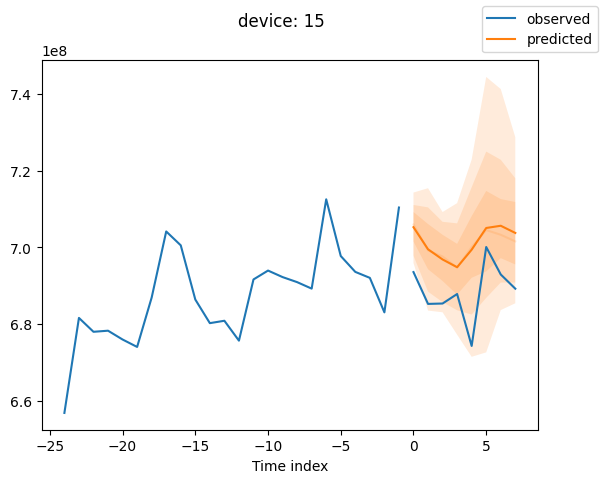

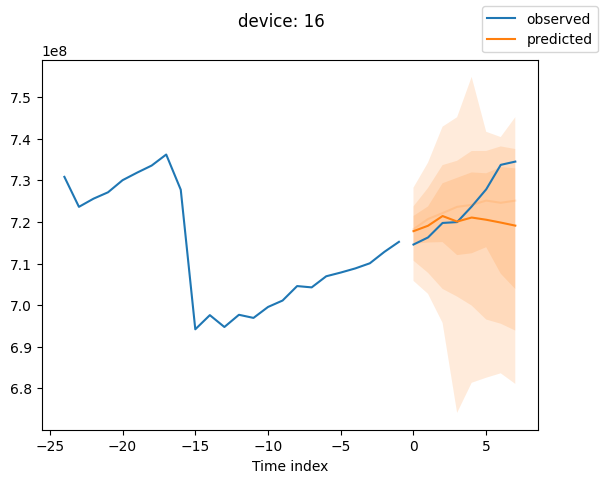

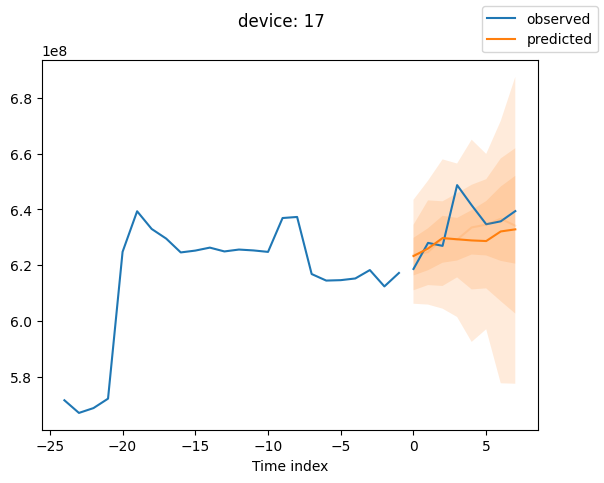

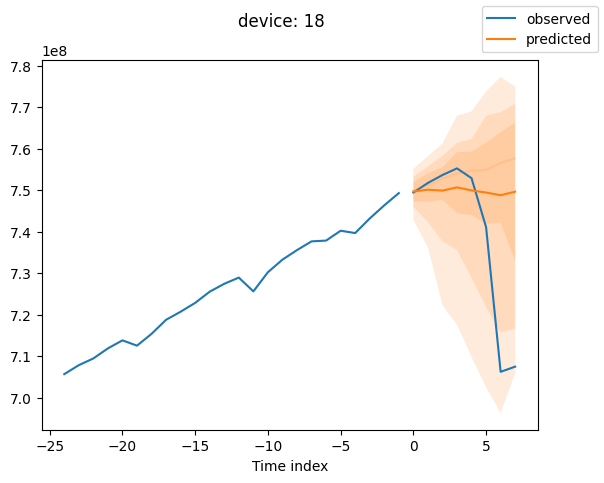

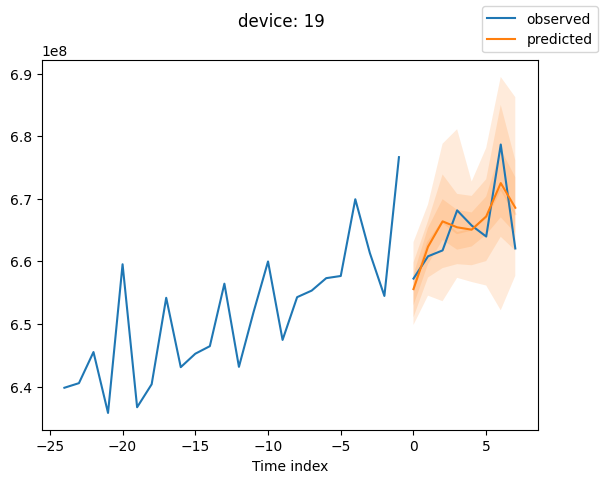

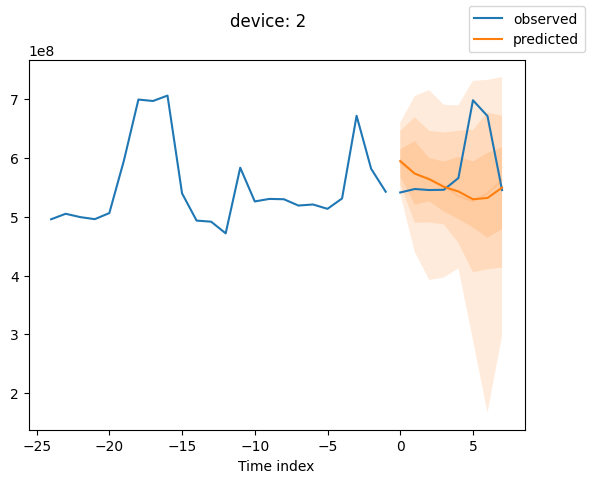

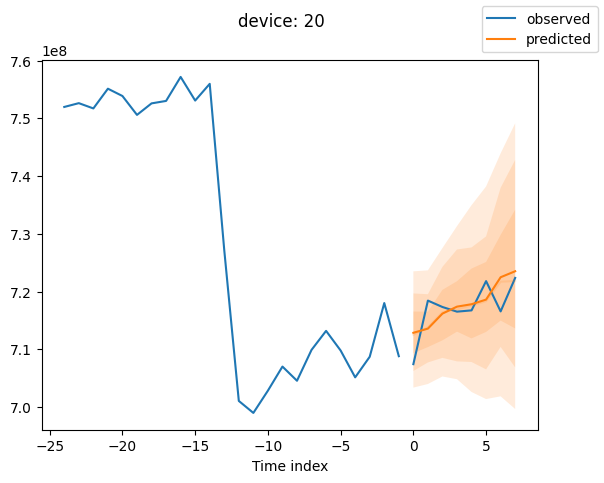

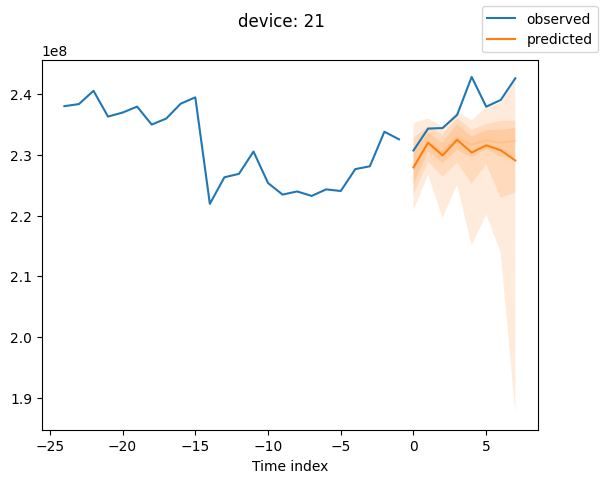

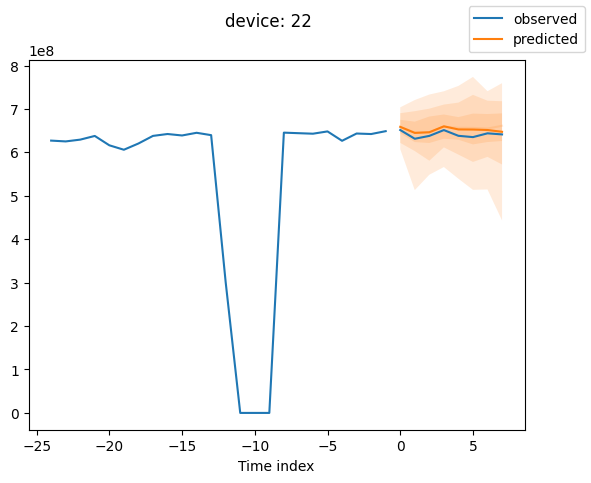

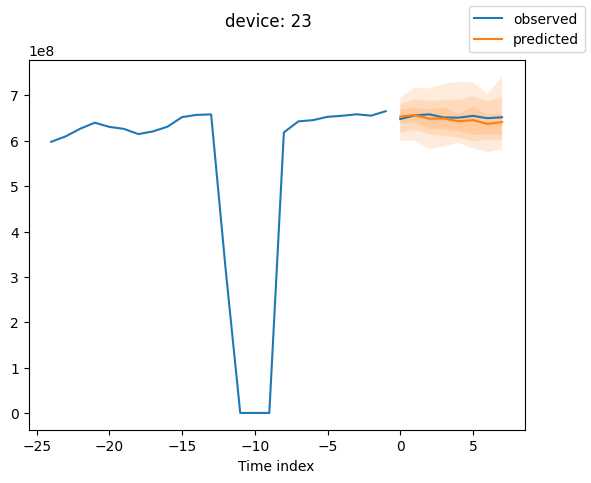

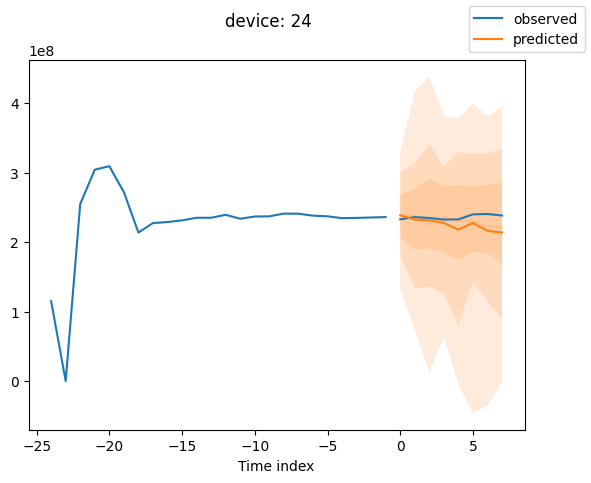

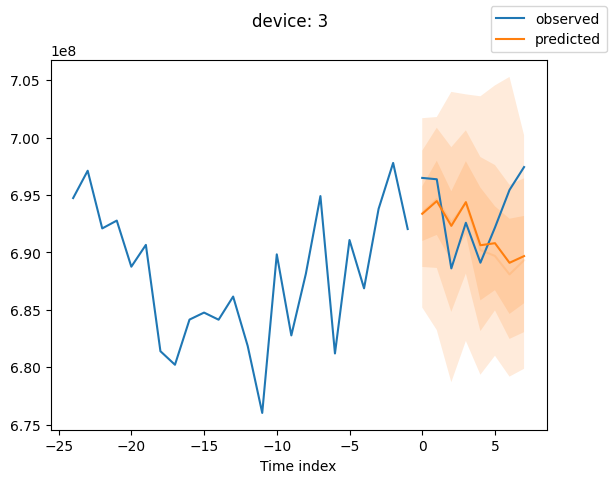

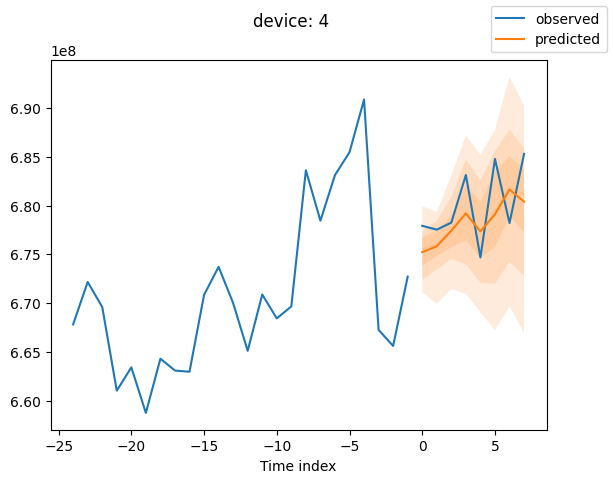

[DeepAR TEST BENCH] ***********************************************************************
[DeepAR TEST BENCH] REPORT for                              metric='container_mem', app='collector':
[DeepAR TEST BENCH] Training time in seconds is             196.40738725662231
[DeepAR TEST BENCH] MSE over the test set is        0.024909980595111847
[DeepAR TEST BENCH] MASE over the test set is       0.7207847833633423
[DeepAR TEST BENCH] MAPE over the test set is       0.488426148891449
[DeepAR TEST BENCH] ***********************************************************************
[DeepAR TEST BENCH] Performance of One-Point Forecasting Method on Full Length Time Series Data


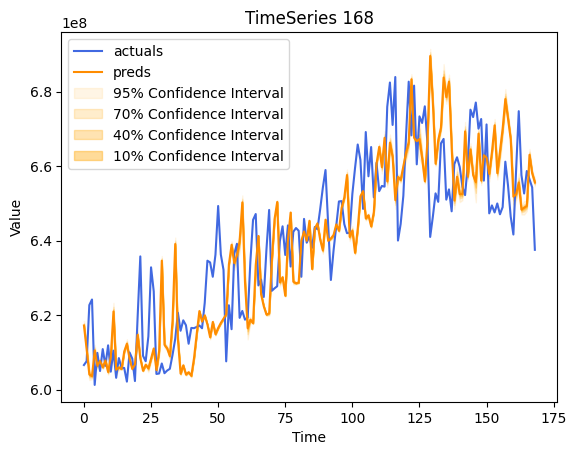

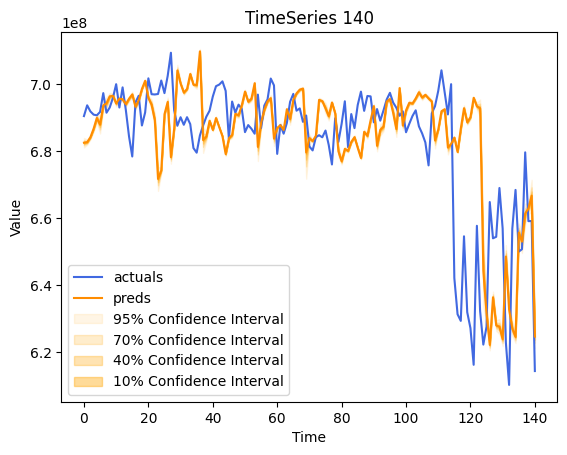

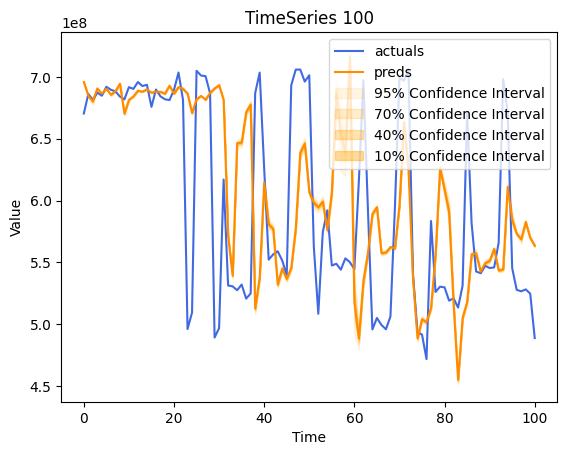

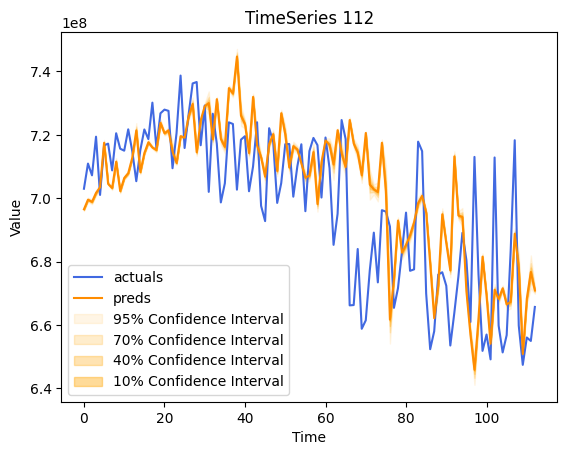

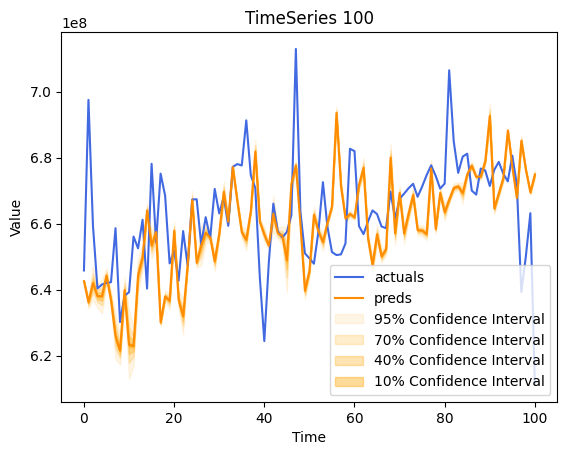

[DeepAR TEST BENCH] Done with metric='container_mem', app='collector'
[DeepAR TEST BENCH] Powering off test bench


In [7]:
tb = bench.TestBenchDeepAR(
    class_to_test=deepAR.DeepARTester,
    path_to_data="C:\\Users\\itay3\\VirtualCodeProjects\\AppLearner-1\\data\\",
    tests_to_perform=test_to_perform
)
res = tb.run_training_and_tests()